# Introduction: 
##### Mobile Price Classifiation: Suppervised Problem  

##### Steps: 

  ##### I. Importing the necessary libraries:
  ##### II. Reading the Train and Test Data: (Source:Kaggle)
  ##### III. Exploratory Data Analysis:
  ##### IV.Fast Train :Before Feature engineering
  ##### V. Feature Engineering:
  ##### VI. Hyperparameter Tuning:
  ##### VII. Boosting:
  ##### VIII. BAGGING:
  ##### IX.Stacking
  ##### X.Voting :
  ##### Artificial Neural Network


# I.Importing the necessary libraries:

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')
%matplotlib inline

# II. Reading the Train and Test Data: 

In [79]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [80]:
train_df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

# III. Exploratory Data Analysis:

 Exploratory data analysis (EDA) is a powerful and simple tool that can be used to improve your understanding of your data, by exploring its properties. The technique is often applied when the goal is to create new hypotheses or find patterns in the data. It’s often used on large amounts of qualitative or quantitative data that haven’t been analyzed before.

## 1.General info:

In [7]:
print(f'The number of rows is    :',train_df.shape[0])
print(f'The number of columns is :',train_df.shape[1])

The number of rows is    : 2000
The number of columns is : 21


([<matplotlib.patches.Wedge at 0x7f5642a63e10>,
 [Text(0.7778174593052024, 0.7778174593052023, '1'),
  Text(-0.7778174593052023, 0.7778174593052024, '2'),
  Text(-0.7778174593052025, -0.7778174593052023, '3'),
  Text(0.7778174593052022, -0.7778174593052025, '0')],
 [Text(0.4242640687119285, 0.42426406871192845, '25.0%'),
  Text(-0.42426406871192845, 0.4242640687119285, '25.0%'),
  Text(-0.4242640687119286, -0.42426406871192845, '25.0%'),
  Text(0.4242640687119284, -0.4242640687119286, '25.0%')])

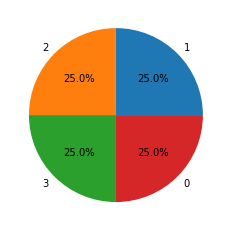

In [8]:
plt.pie(train_df['price_range'].value_counts(),labels=train_df['price_range'].unique(),autopct='%1.1f%%')

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Observation1 (info()): 
##### All the features are numerical.(No Categorical Features).So we don't need the encoding step.

In [10]:
train_df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

#### Observation2 (Describe()): 
##### It looks like we don't have outliers and null values.   
##### Because : count=train_df.shape[0]=2000   
##### But let's go deeper into this dataset and check out. 

## 2.Check Null values with graphs:

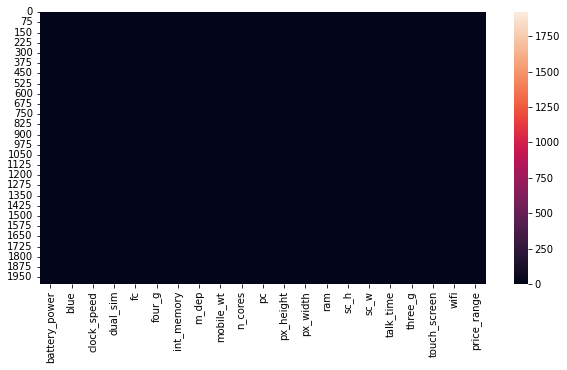

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(train_df.isna(),vmax=1920)

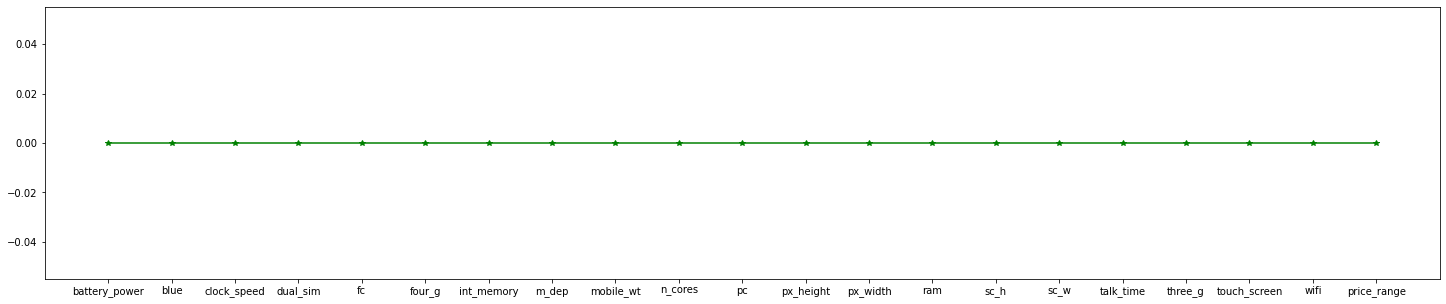

In [12]:
plt.figure(figsize=(25,5))
plt.plot(train_df.isna().sum(),marker='*',c='green')

#### Observation2.1(isna()):
##### We don't have null values.

## 3.Skewed data:

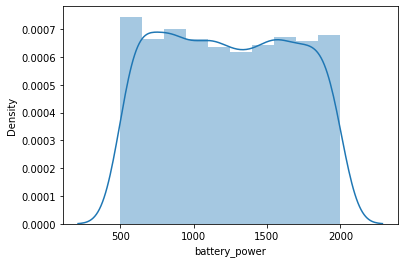

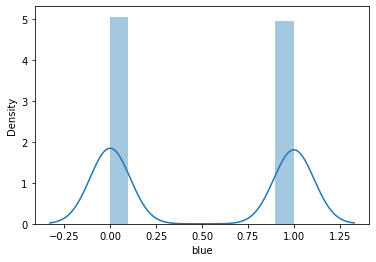

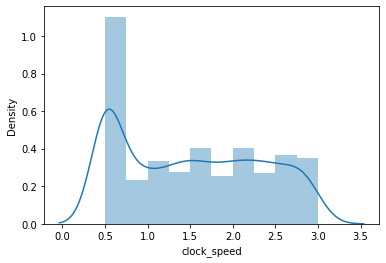

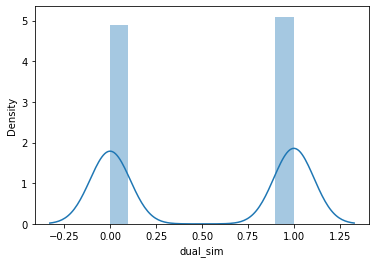

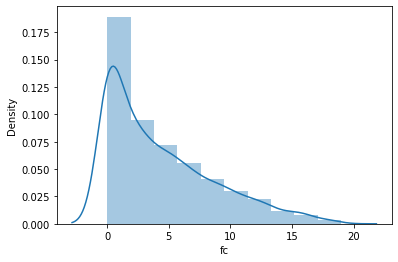

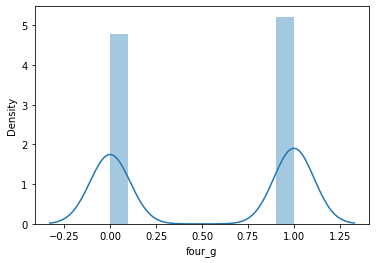

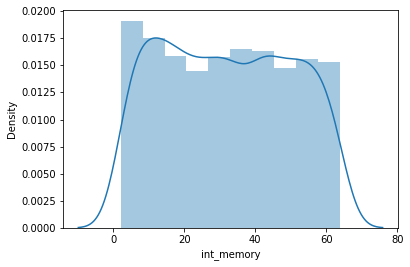

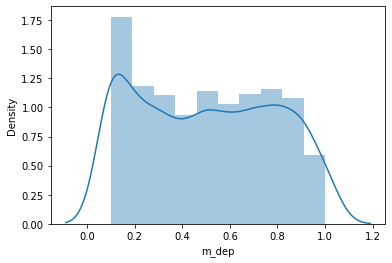

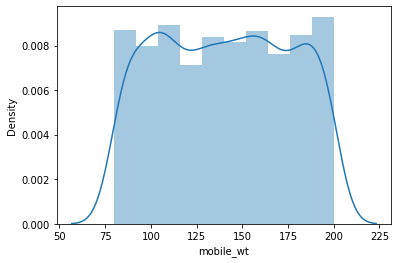

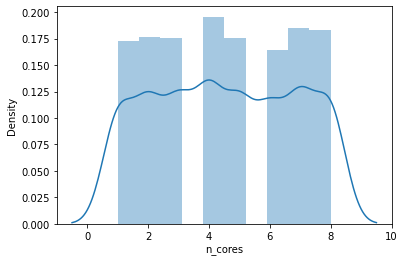

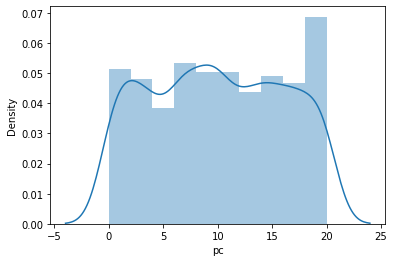

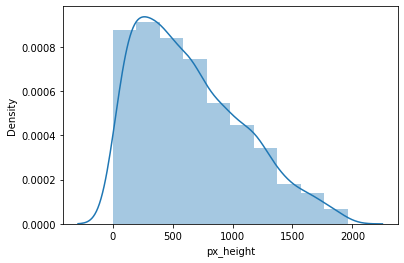

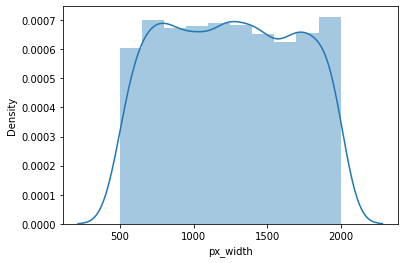

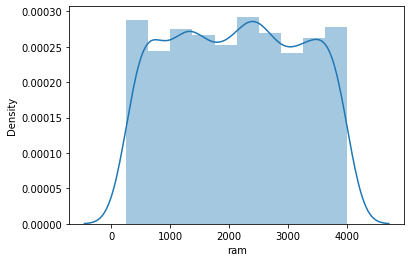

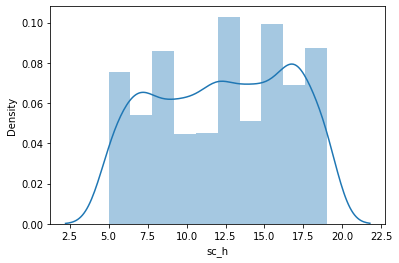

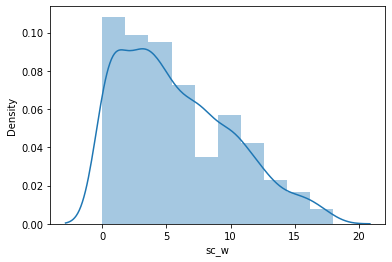

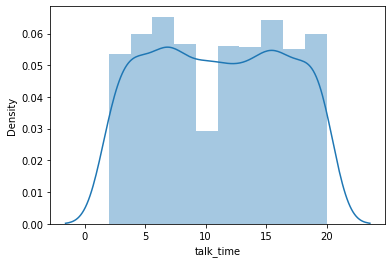

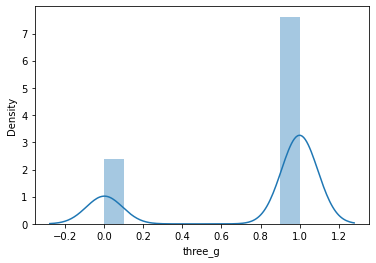

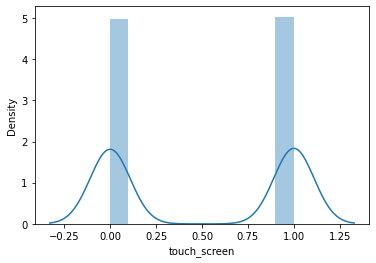

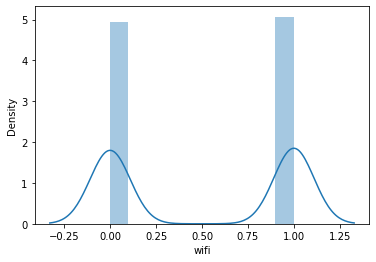

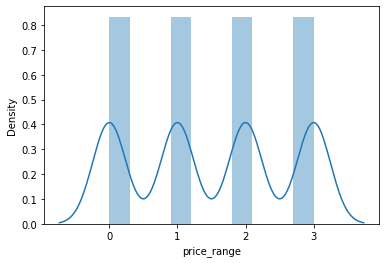

In [13]:
for col in train_df.columns:
    plt.figure()
    sns.distplot(train_df[col],bins=10)

#### observation 3:
   ##### columns with positive skew='fc','px_height','sc_w'

## 4.Outliers: 

### standard deviation:    (mean - 3*std) < x < (mean + 3*std)

In [14]:
#standard deviation
def check_outliers_with_std(train_df):
    print('end checking..')
    for col in train_df.columns:
        std=train_df[col].std()
        mean=train_df[col].mean()

        outliers_with_std=train_df[(train_df[col]<mean-3*std) | (train_df[col]>mean+3*std)][col]
        if(outliers_with_std.shape[0]>0):
            print('With standard deviation we have :{} outliers'.format(outliers_with_std.shape[0]))
            plt.figure(figsize=(15,3))
            sns.countplot(outliers_with_std,hue=train_df['price_range'])
            plt.figure(figsize=(15,3))
            sns.countplot(train_df[col],hue=train_df['price_range'])
            print(outliers_with_std.index)
    print('end checking..')

end checking..
With standard deviation we have :12 outliers
Int64Index([95, 226, 305, 1387, 1406, 1416, 1554, 1693, 1705, 1880, 1882,
            1888],
           dtype='int64')
end checking..


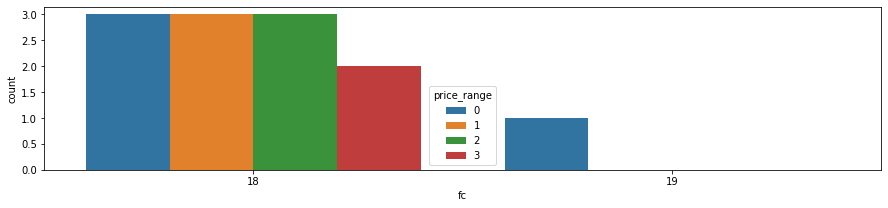

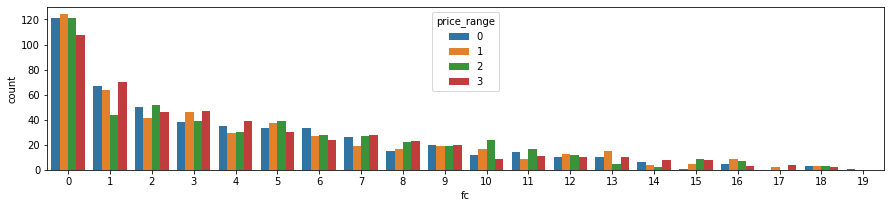

In [15]:
check_outliers_with_std(train_df)

### Z_SCORE:

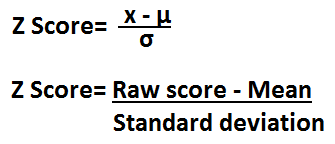

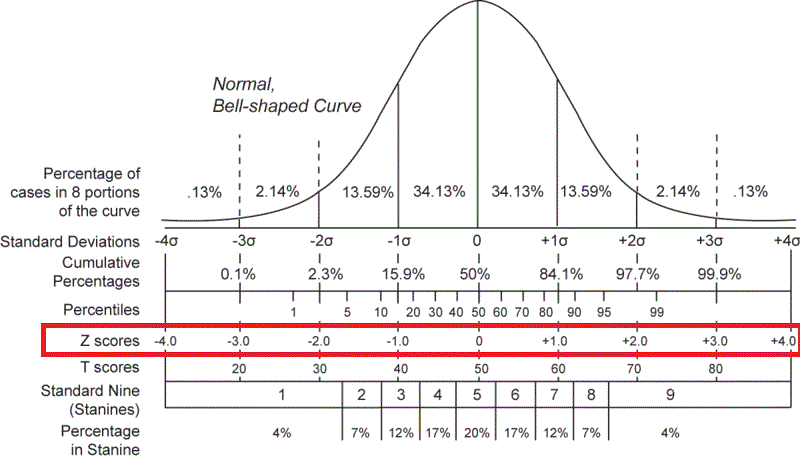

####  -3  <  Z_SCORE  < +3

In [16]:
#z_score:
def check_outliers_with_z_index(train_df,rang):
    print('checking..')
    for col in train_df.columns:
        std=train_df[col].std()
        mean=train_df[col].mean()

        outliers_with_z_score=train_df[((train_df[col]-mean)/std <-abs(rang)) | ((train_df[col]-mean)/std >abs(rang))][col]
        if(outliers_with_z_score.shape[0]>0):
            print('In col [{}]: we have :{} outliers with z_score '.format(col,outliers_with_z_score.shape[0]))
            plt.figure(figsize=(15,3))
            sns.countplot(outliers_with_z_score,hue=train_df['price_range'])
            plt.figure(figsize=(15,3))
            sns.countplot(train_df[col])
    print('end checking..')

checking..
In col [fc]: we have :12 outliers with z_score 
end checking..


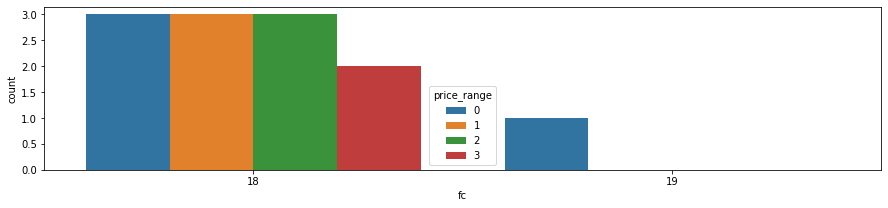

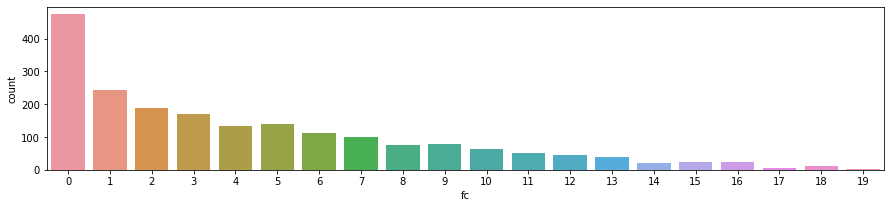

In [17]:
check_outliers_with_z_index(train_df,3)

#### Observation 4.1:
   ##### z_score and standard_deviation give us the same number of outliers :12
   ##### but,are they the same lines?

In [18]:
standard_deviation_index=[95,226, 305, 1387, 1406, 1416, 1554, 1693, 1705, 1880, 1882,1888]
z_score=[95, 226, 305, 1387, 1406, 1416, 1554, 1693, 1705, 1880,1882,1888]
standard_deviation_index==z_score

True

####  -2  <  Z_SCORE  < +2

checking..
In col [fc]: we have :125 outliers with z_score 
In col [px_height]: we have :89 outliers with z_score 
In col [sc_w]: we have :87 outliers with z_score 
end checking..


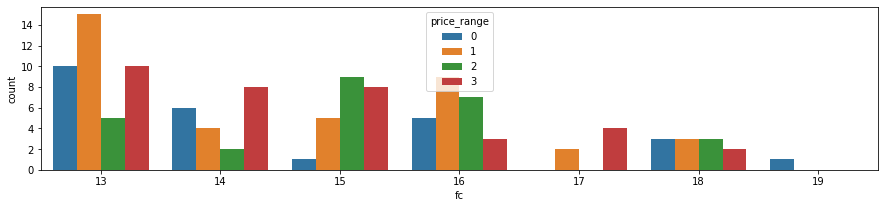

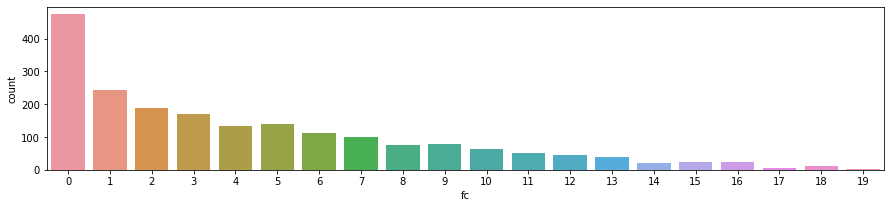

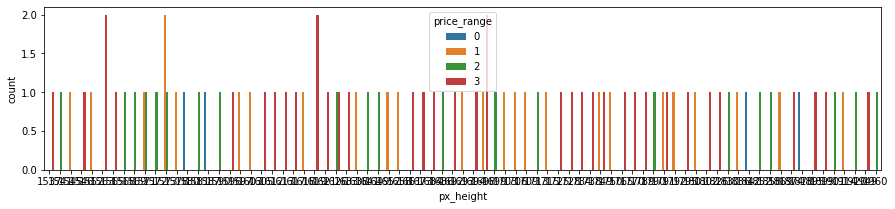

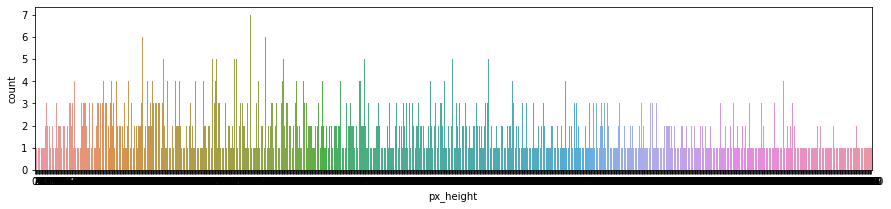

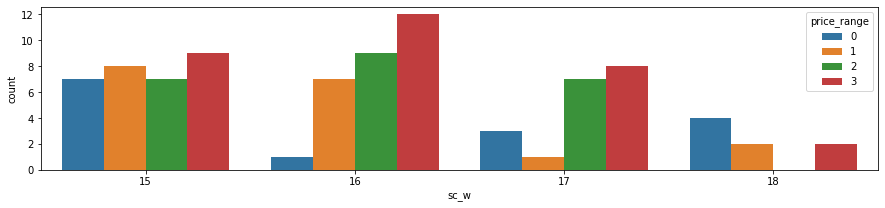

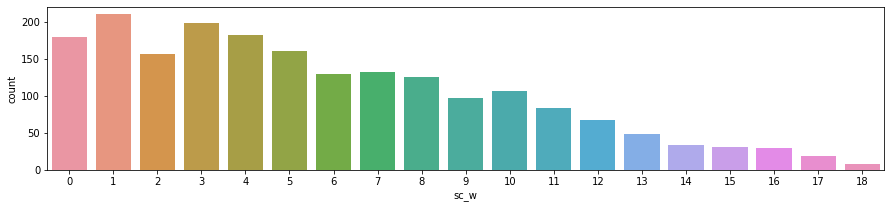

In [19]:
check_outliers_with_z_index(train_df,2)

#### Observation 4.2:with  -2 <z_score <2
   ##### we see that :the columns which have outliers are the  same columns with positive skew.

### Interquartile Range :IQR =Q3 - Q1

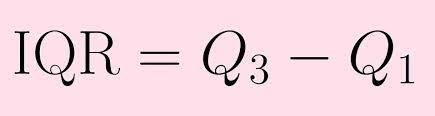

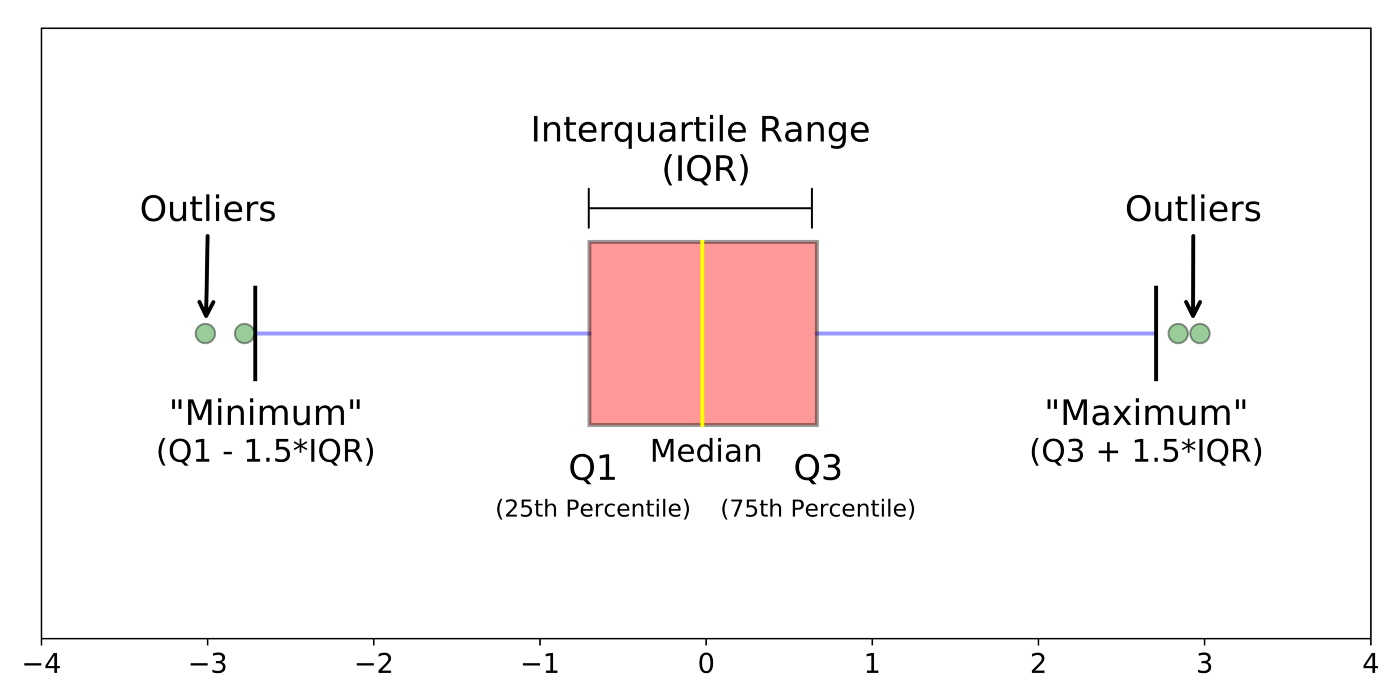

In [20]:
def check_outliers_with_IQR(train_df):
    print('checking..')
    for col in train_df.columns:
        Q1=train_df[col].quantile(0.25)
        Q3=train_df[col].quantile(0.75)
        IQR=Q3-Q1
        outliers_with_IQR=train_df[((train_df[col]<(Q1-1.5*IQR)) | (train_df[col]>(Q3 + 1.5*IQR)))][col]
        if (outliers_with_IQR.shape[0]>0):
            print('In col [{}]: we have :{} outliers with IQR'.format(col,outliers_with_IQR.shape[0]))
            print('index are:',list(outliers_with_IQR.index),'\n')
            plt.figure(figsize=(15,3))
            sns.countplot(outliers_with_IQR,hue=train_df['price_range'])
            plt.figure(figsize=(15,3))
            sns.countplot(train_df[col])
    print('end checking..')

checking..
In col [fc]: we have :18 outliers with IQR
index are: [95, 169, 226, 229, 300, 305, 372, 584, 1387, 1406, 1416, 1549, 1554, 1693, 1705, 1880, 1882, 1888] 

In col [px_height]: we have :2 outliers with IQR
index are: [988, 1771] 

In col [three_g]: we have :477 outliers with IQR
index are: [0, 10, 19, 22, 30, 45, 49, 51, 54, 58, 67, 74, 77, 79, 82, 85, 86, 94, 98, 106, 111, 118, 120, 122, 125, 134, 135, 139, 146, 148, 151, 154, 158, 159, 176, 179, 182, 207, 212, 219, 222, 224, 227, 229, 230, 231, 246, 250, 251, 254, 263, 269, 279, 286, 289, 290, 291, 296, 298, 301, 303, 307, 308, 310, 311, 314, 322, 325, 326, 327, 328, 329, 330, 334, 335, 343, 344, 349, 351, 352, 356, 360, 362, 364, 370, 373, 378, 380, 387, 390, 391, 392, 406, 412, 413, 416, 423, 424, 431, 439, 440, 442, 443, 445, 449, 456, 463, 469, 470, 471, 474, 477, 478, 482, 488, 493, 496, 500, 505, 507, 508, 511, 515, 518, 523, 537, 539, 547, 550, 555, 558, 560, 561, 563, 564, 565, 567, 568, 577, 584, 588, 589, 590, 592

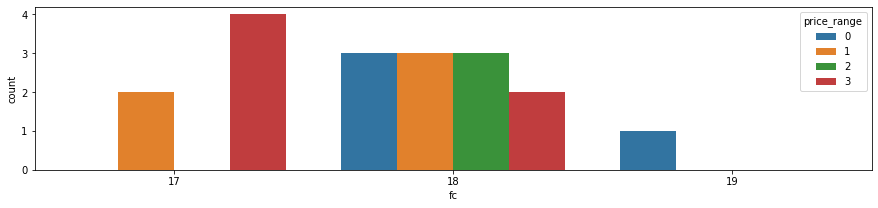

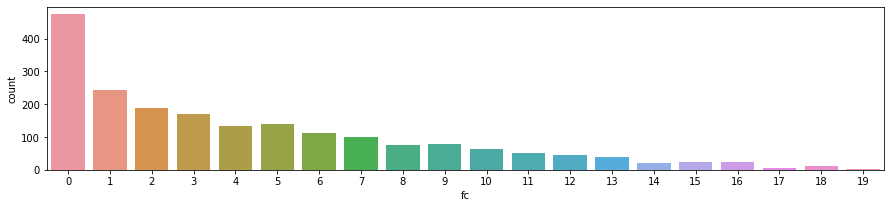

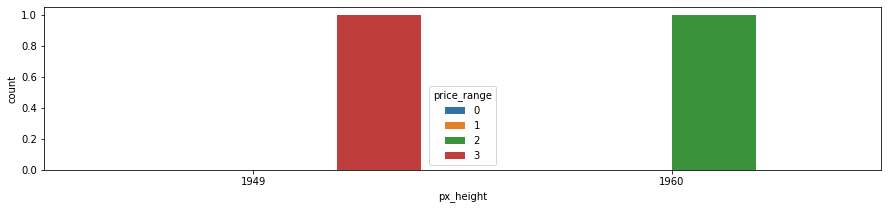

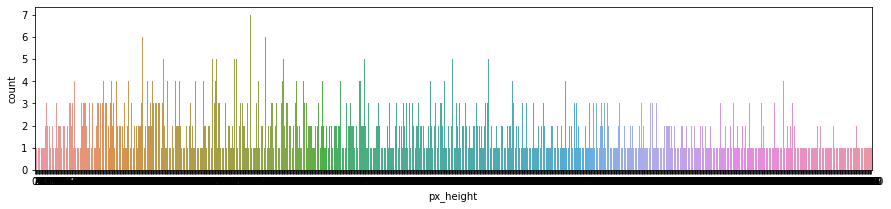

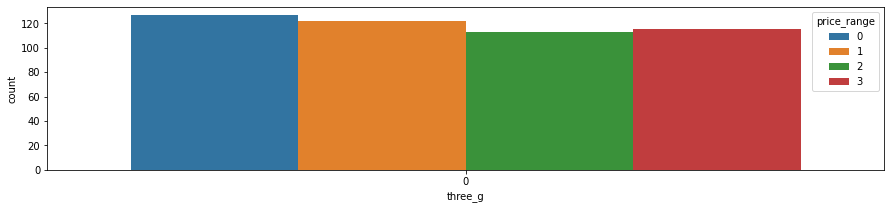

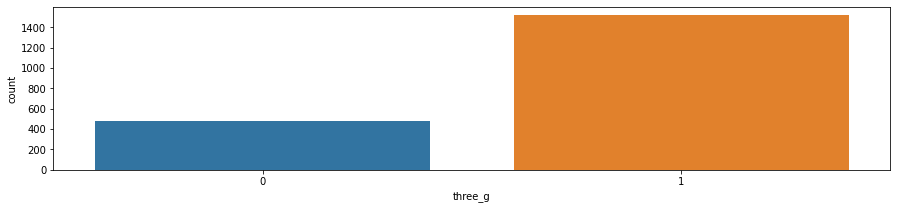

In [21]:
check_outliers_with_IQR(train_df)

In [22]:
print(((477+2+18)/train_df.shape[0])*100,'%')

24.85 %


#### Observation 4.3:
   ##### -We have more lines with Outliers with IQR.
   ##### -It shows new column with Outliers:  'three_g' .
   ##### -25% of data was concidered as Outliers with IQR.

## 5.Correlation:

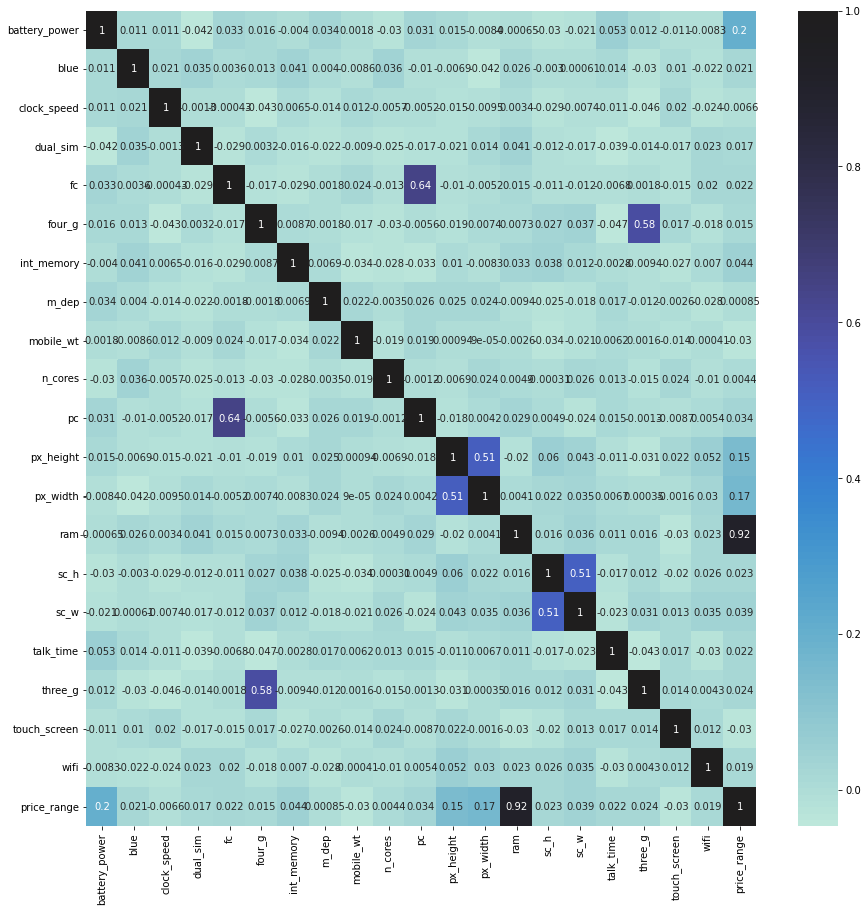

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(train_df.corr(),annot=True,center=1)

#### Observation 5.1:
##### -we have a high correlation between 'px_width' and 'px_height'
##### -we have a high correlation between 'sc_h' and 'sc_w'
##### -we have a high correlation between 'three_g' and 'four_g'
##### -we have a high correlation between 'pc' and 'fc'

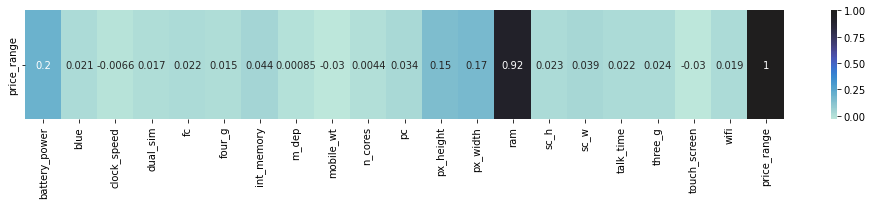

In [24]:
plt.figure(figsize=(17,2))
sns.heatmap(train_df.corr()[-1:],annot=True,center=1)

#### Obbservation 5.2:
##### -we have a high correlation between target feature 'price_range' and train features ('ram', 'battery_power', 'px_width', 'px_height' )

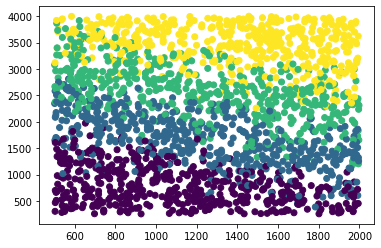

In [25]:
plt.scatter(train_df['battery_power'],train_df['ram'],c=train_df['price_range'])

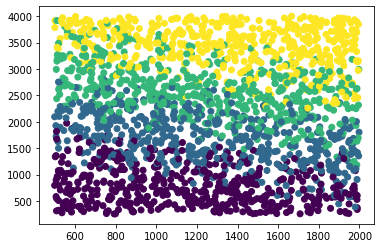

In [26]:
plt.scatter(train_df['px_width'],train_df['ram'],c=train_df['price_range'])

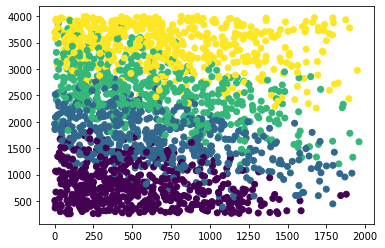

In [27]:
plt.scatter(train_df['px_height'],train_df['ram'],c=train_df['price_range'])

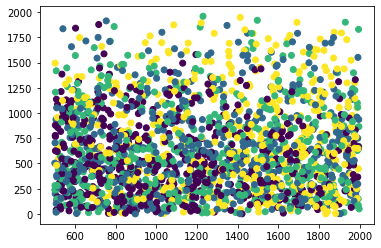

In [28]:
plt.scatter(train_df['battery_power'],train_df['px_height'],c=train_df['price_range'])

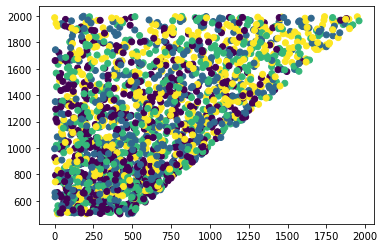

In [29]:
plt.scatter(train_df['px_height'],train_df['px_width'],c=train_df['price_range'])

#### Observation 5.3:
##### -It's clear that 'ram' is the most important feature.

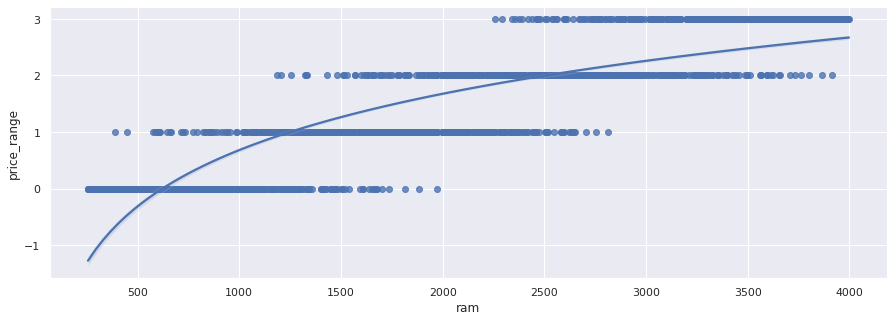

In [30]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(15,5))
sns.regplot(train_df['ram'],y=train_df['price_range'],logx=True)

# IV.Fast Train :Before Feature engineering

## Spliting:

In [81]:
x=train_df.drop('price_range',axis=1)
y=train_df['price_range']

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.25,random_state=42)
x_train.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1738            511     0          0.9         1  15       1          24   
548             641     1          1.1         0   0       1           7   
936             805     0          0.8         0   1       0          34   
1389           1801     0          0.5         1   6       0          52   
1607            744     0          1.7         1   0       1          33   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1738    0.6        136        3  18        367      1264  2378    18     3   
548     0.9        192        1   3        417       759  3595     7     5   
936     0.6         88        6   2       1262      1538  3647    18    11   
1389    0.9        120        6  10        100      1708   258    14     8   
1607    0.5        105        4   2       1252      1963  2700     9     3   

      talk_time  three_g  touch_screen  wifi  
1738          4        1             0     0  
548          19        1             1     1  
936           9        1             0     1  
1389          9        1             0     0  
1607         19        1             0     0

## Training + Evaluation(Recall,Precision,f1-score)

In [84]:
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
sgdc=SGDClassifier()
svc=SVC()
rfc=RandomForestClassifier()

models={'knn':knn,'dt':dt,'sgdc':sgdc,'svc':svc,'rfc':rfc}

train_results=[]
val_results=[]
for name,model in models.items():
    model.fit(x_train,y_train)
    train_score=model.score(x_train,y_train)
    val_score=model.score(x_val,y_val)
    print('model :{} train f1-score: {} val_score: {}'.format(name,train_score,val_score))
    train_results.append(train_score)
    val_results.append(val_score)

model :knn train f1-score: 0.956 val_score: 0.932
model :dt train f1-score: 1.0 val_score: 0.806
model :sgdc train f1-score: 0.5546666666666666 val_score: 0.53
model :svc train f1-score: 0.9553333333333334 val_score: 0.952
model :rfc train f1-score: 1.0 val_score: 0.87


#### Observation 6.1:
##### we have underfitting with 'sgdc' model.
##### we have overfitting with 'DecisionTreeClassifier' and 'RandomForestClassifier' models

In [85]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print(classification_report(y_train,knn.predict(x_train)))
print(classification_report(y_val,knn.predict(x_val)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       368
           1       0.93      0.96      0.95       382
           2       0.94      0.94      0.94       380
           3       0.98      0.95      0.97       370

    accuracy                           0.96      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.96      0.96      0.96      1500

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       132
           1       0.89      0.93      0.91       118
           2       0.92      0.89      0.91       120
           3       0.96      0.95      0.95       130

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



In [86]:
svc=SVC()
svc.fit(x_train,y_train)
print(classification_report(y_train,svc.predict(x_train)))
print(classification_report(y_val,svc.predict(x_val)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       368
           1       0.93      0.95      0.94       382
           2       0.95      0.91      0.93       380
           3       0.97      0.97      0.97       370

    accuracy                           0.96      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.96      0.96      0.96      1500

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       132
           1       0.92      0.97      0.95       118
           2       0.95      0.91      0.93       120
           3       0.96      0.95      0.96       130

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



#### Observation 6.2:
##### we have perfect results with 'knn' and 'svc' models without feature engineering.But we will try to  improve the model

# V.Feature Engineering:

## 1.Handling Outliers (IQR):  'Replacing the outliers by IQR'

In [87]:
def IQR_Imputation(train_df):
    df=train_df.copy()
    for col in df.columns:
        mean=df[col].mean()
        std=df[col].std()
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        outliers=df[((df[col]<(Q1-1.5*IQR)) | (df[col]>(Q3 + 1.5*IQR)))][col]
        print('col: {} number of outliers is: {}'.format(col,outliers.shape[0]))
        print(list(outliers.index))
        df[col][list(outliers.index)]=df[col].mode()[0]
    return df

In [88]:
df_no_outliers=IQR_Imputation(train_df)
df_no_outliers.shape

col: battery_power number of outliers is: 0
[]
col: blue number of outliers is: 0
[]
col: clock_speed number of outliers is: 0
[]
col: dual_sim number of outliers is: 0
[]
col: fc number of outliers is: 18
[95, 169, 226, 229, 300, 305, 372, 584, 1387, 1406, 1416, 1549, 1554, 1693, 1705, 1880, 1882, 1888]
col: four_g number of outliers is: 0
[]
col: int_memory number of outliers is: 0
[]
col: m_dep number of outliers is: 0
[]
col: mobile_wt number of outliers is: 0
[]
col: n_cores number of outliers is: 0
[]
col: pc number of outliers is: 0
[]
col: px_height number of outliers is: 2
[988, 1771]
col: px_width number of outliers is: 0
[]
col: ram number of outliers is: 0
[]
col: sc_h number of outliers is: 0
[]
col: sc_w number of outliers is: 0
[]
col: talk_time number of outliers is: 0
[]
col: three_g number of outliers is: 477
[0, 10, 19, 22, 30, 45, 49, 51, 54, 58, 67, 74, 77, 79, 82, 85, 86, 94, 98, 106, 111, 118, 120, 122, 125, 134, 135, 139, 146, 148, 151, 154, 158, 159, 176, 179, 

(2000, 21)

In [89]:
check_outliers_with_IQR(df_no_outliers)

checking..
end checking..


In [90]:
df_no_outliers.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        1             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]


## 2.Scaling:MinMaxScaling df_no_outliers +test_df

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
sc=MinMaxScaler()
df_no_outliers[df_no_outliers.drop(['price_range'],axis=1).columns]=sc.fit_transform(df_no_outliers.drop(['price_range'],axis=1))

In [93]:
df_no_outliers.head()

battery_power  blue  clock_speed  dual_sim      fc  four_g  int_memory  \
0       0.227789   0.0         0.68       0.0  0.0625     0.0    0.080645   
1       0.347361   1.0         0.00       1.0  0.0000     1.0    0.822581   
2       0.041416   1.0         0.00       1.0  0.1250     1.0    0.629032   
3       0.076152   1.0         0.80       0.0  0.0000     0.0    0.129032   
4       0.881764   1.0         0.28       0.0  0.8125     1.0    0.677419   

      m_dep  mobile_wt   n_cores  ...  px_height  px_width       ram  \
0  0.555556   0.900000  0.142857  ...   0.010417  0.170895  0.612774   
1  0.666667   0.466667  0.285714  ...   0.471354  0.993324  0.634687   
2  0.888889   0.541667  0.571429  ...   0.657813  0.811749  0.627205   
3  0.777778   0.425000  0.714286  ...   0.633333  0.858478  0.671566   
4  0.555556   0.508333  0.142857  ...   0.629167  0.475300  0.308658   

       sc_h      sc_w  talk_time  three_g  touch_screen  wifi  price_range  
0  0.285714  0.388889   0.944444      0.0           0.0   1.0            1  
1  0.857143  0.166667   0.277778      0.0           1.0   0.0            2  
2  0.428571  0.111111   0.388889      0.0           1.0   0.0            2  
3  0.785714  0.444444   0.500000      0.0           0.0   0.0            2  
4  0.214286  0.111111   0.722222      0.0           1.0   0.0            1  

[5 rows x 21 columns]

In [94]:
test_df=test_df.drop('id',axis=1)

In [95]:
test_df[test_df.columns]=sc.transform(test_df)

## 3. x and y:  

In [96]:
x2=df_no_outliers.drop(['price_range'],axis=1)
y2=df_no_outliers['price_range']

In [97]:
y2.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [98]:
x2.head()

battery_power  blue  clock_speed  dual_sim      fc  four_g  int_memory  \
0       0.227789   0.0         0.68       0.0  0.0625     0.0    0.080645   
1       0.347361   1.0         0.00       1.0  0.0000     1.0    0.822581   
2       0.041416   1.0         0.00       1.0  0.1250     1.0    0.629032   
3       0.076152   1.0         0.80       0.0  0.0000     0.0    0.129032   
4       0.881764   1.0         0.28       0.0  0.8125     1.0    0.677419   

      m_dep  mobile_wt   n_cores    pc  px_height  px_width       ram  \
0  0.555556   0.900000  0.142857  0.10   0.010417  0.170895  0.612774   
1  0.666667   0.466667  0.285714  0.30   0.471354  0.993324  0.634687   
2  0.888889   0.541667  0.571429  0.30   0.657813  0.811749  0.627205   
3  0.777778   0.425000  0.714286  0.45   0.633333  0.858478  0.671566   
4  0.555556   0.508333  0.142857  0.70   0.629167  0.475300  0.308658   

       sc_h      sc_w  talk_time  three_g  touch_screen  wifi  
0  0.285714  0.388889   0.944444      0.0           0.0   1.0  
1  0.857143  0.166667   0.277778      0.0           1.0   0.0  
2  0.428571  0.111111   0.388889      0.0           1.0   0.0  
3  0.785714  0.444444   0.500000      0.0           0.0   0.0  
4  0.214286  0.111111   0.722222      0.0           1.0   0.0

## 4.Feature_selection1:SelectKBest

In [99]:
from sklearn.feature_selection import chi2,SelectKBest

In [100]:
KBest_selector=SelectKBest(chi2,k=10)

In [101]:
x_Kbest=KBest_selector.fit_transform(x2,y2)
KBest_selector.get_support()

array([ True, False, False, False, False,  True,  True, False,  True,
        True, False,  True,  True,  True,  True, False, False, False,
        True, False])

In [102]:
x_Kbest=x2[x2.columns[KBest_selector.get_support()]]
x_Kbest.head()

battery_power  four_g  int_memory  mobile_wt   n_cores  px_height  \
0       0.227789     0.0    0.080645   0.900000  0.142857   0.010417   
1       0.347361     1.0    0.822581   0.466667  0.285714   0.471354   
2       0.041416     1.0    0.629032   0.541667  0.571429   0.657813   
3       0.076152     0.0    0.129032   0.425000  0.714286   0.633333   
4       0.881764     1.0    0.677419   0.508333  0.142857   0.629167   

   px_width       ram      sc_h  touch_screen  
0  0.170895  0.612774  0.285714           0.0  
1  0.993324  0.634687  0.857143           1.0  
2  0.811749  0.627205  0.428571           1.0  
3  0.858478  0.671566  0.785714           0.0  
4  0.475300  0.308658  0.214286           1.0

### 4.1Training

In [103]:
x_kbest_train,x_kbest_val,y_kbest_train ,y_kbest_val=train_test_split(x_Kbest,y2,test_size=0.25,random_state=42)
knn2=KNeighborsClassifier()
dt2=DecisionTreeClassifier()
sgdc2=SGDClassifier()
svc2=SVC()
rfc2=RandomForestClassifier()

models2={'knn':knn2,'dt':dt2,'sgdc':sgdc2,'svc':svc2,'rfc':rfc2}
train_results2=[]
val_results2=[]
for name,model in models2.items():
    model.fit(x_kbest_train,y_kbest_train)
    train_score=model.score(x_kbest_train,y_kbest_train)
    val_score=model.score(x_kbest_val,y_kbest_val)
    print('model :{} train f1-score: {} val_score: {}'.format(name,train_score,val_score))
    train_results2.append(train_score)
    val_results2.append(val_score)

model :knn train f1-score: 0.7693333333333333 val_score: 0.648
model :dt train f1-score: 1.0 val_score: 0.838
model :sgdc train f1-score: 0.7633333333333333 val_score: 0.756
model :svc train f1-score: 0.9573333333333334 val_score: 0.916
model :rfc train f1-score: 1.0 val_score: 0.908


### 4.2 Evaluation

Text(0.5, 1.0, 'First and Second Traning results')

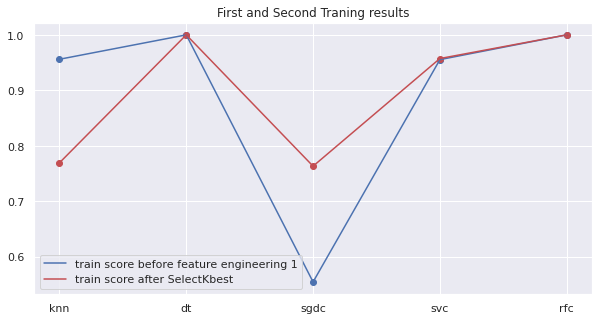

In [104]:
plt.figure(figsize=(10,5))
plt.scatter(x=models.keys(),y=train_results,c='b',)
plt.plot(train_results,c='b',label='train score before feature engineering 1')
plt.scatter(x=models.keys(),y=train_results2,c='r')
plt.plot(train_results2,c='r',label='train score after SelectKbest')
plt.legend()
plt.title('First and Second Traning results')

Text(0.5, 1.0, 'First and Second validation results')

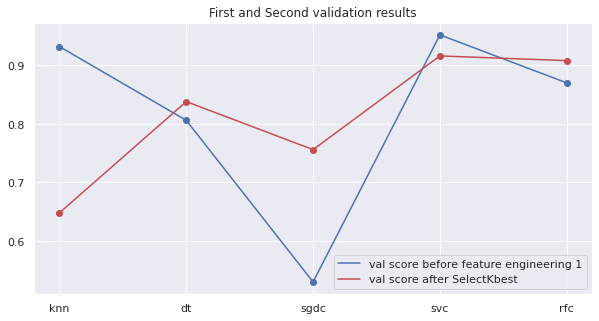

In [105]:
plt.figure(figsize=(10,5))
plt.scatter(x=models.keys(),y=val_results,c='b',)
plt.plot(val_results,c='b',label='val score before feature engineering 1')
plt.scatter(x=models.keys(),y=val_results2,c='r')
plt.plot(val_results2,c='r',label='val score after SelectKbest')
plt.legend()
plt.title('First and Second validation results')

#### Observation :
##### we have one improvement in train score of sgdc model with ~0.2 .
##### in general we have an imporvement in validation scores of all models except knn.

## 5.Feature slecetion 2:SelectFromModel:
##### Meta-transformer for selecting features based on importance weights.

In [106]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score,StratifiedKFold

 
 
   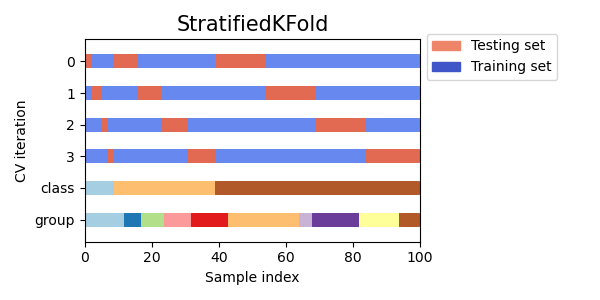
####StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.

### 5.1 DecisionTreeClassifier:

In [107]:
sfm=SelectFromModel(DecisionTreeClassifier())
sfm.fit_transform(x2,y2)
best_features=sfm.get_feature_names_out()
x_dt_sfm=x2[best_features]
x_dt_sfm.head()

battery_power  px_height  px_width       ram
0       0.227789   0.010417  0.170895  0.612774
1       0.347361   0.471354  0.993324  0.634687
2       0.041416   0.657813  0.811749  0.627205
3       0.076152   0.633333  0.858478  0.671566
4       0.881764   0.629167  0.475300  0.308658

In [108]:
dt_sfm=DecisionTreeClassifier()
cv=StratifiedKFold(4)
cross_val_score(dt_sfm,x_dt_sfm,y2,cv=cv).mean()

0.856

#### Observation:
##### we have no improvement with DecisionTreeClassifier()

### 5.2 SGDClassifier:

In [109]:
sfm=SelectFromModel(SGDClassifier())
sfm.fit_transform(x2,y2)
best_features=sfm.get_feature_names_out()
x_sgdc_sfm=x2[best_features]
x_sgdc_sfm.head()

battery_power  px_height  px_width       ram
0       0.227789   0.010417  0.170895  0.612774
1       0.347361   0.471354  0.993324  0.634687
2       0.041416   0.657813  0.811749  0.627205
3       0.076152   0.633333  0.858478  0.671566
4       0.881764   0.629167  0.475300  0.308658

In [110]:
sgdc_sfm=SGDClassifier()
cv=StratifiedKFold(4)
cross_val_score(sgdc_sfm,x_sgdc_sfm,y2,cv=cv).mean()

0.7515000000000001

#### Observation:
##### -We have no improvement with SGDClassifier().
##### -Now we will continue the training with the same best  features for KNN and SVC and RandomForestClassifier.

### Save Scaler for new features

In [123]:
best_df_no_outliers=IQR_Imputation(train_df[best_features])
best_df_no_outliers.head()

col: battery_power number of outliers is: 0
[]
col: px_height number of outliers is: 2
[988, 1771]
col: px_width number of outliers is: 0
[]
col: ram number of outliers is: 0
[]


battery_power  px_height  px_width   ram
0            842         20       756  2549
1           1021        905      1988  2631
2            563       1263      1716  2603
3            615       1216      1786  2769
4           1821       1208      1212  1411

In [126]:
scaler2=MinMaxScaler()
best_df_no_outliers_sc=scaler2.fit_transform(best_df_no_outliers)
best_df_no_outliers_sc[:10]

array([[0.22778891, 0.01041667, 0.17089453, 0.61277392],
       [0.34736139, 0.47135417, 0.99332443, 0.63468733],
       [0.04141617, 0.6578125 , 0.811749  , 0.6272047 ],
       [0.0761523 , 0.63333333, 0.85847797, 0.67156601],
       [0.88176353, 0.62916667, 0.4753004 , 0.30865847],
       [0.90714763, 0.52291667, 0.77036048, 0.21672902],
       [0.88176353, 0.1984375 , 0.34579439, 0.79208979],
       [0.97060788, 0.26666667, 0.43324433, 0.11865313],
       [0.63059452, 0.20104167, 0.22429907, 0.2252806 ],
       [0.00534402, 0.5921875 , 0.48331108, 0.06867985]])

In [127]:
scaler2.transform(best_df_no_outliers)

array([[0.22778891, 0.01041667, 0.17089453, 0.61277392],
       [0.34736139, 0.47135417, 0.99332443, 0.63468733],
       [0.04141617, 0.6578125 , 0.811749  , 0.6272047 ],
       ...,
       [0.94188377, 0.45208333, 0.75567423, 0.7485302 ],
       [0.6753507 , 0.175     , 0.11348465, 0.16381614],
       [0.00601202, 0.2515625 , 0.16955941, 0.9788883 ]])

In [116]:
pickle.dump(scaler2,open('scaler.pkl','wb'))

### 5.3 KNeighborsClassifier :(with best features)

In [117]:
knn_sfm=KNeighborsClassifier()
cv=StratifiedKFold(4)
cross_val_score(knn_sfm,x_sgdc_sfm,y2,cv=cv).mean()

0.8945000000000001

### 5.4 RandomForestClassifier :(with best features)

In [118]:
rfc_sfm=RandomForestClassifier()
cv=StratifiedKFold(4)
cross_val_score(rfc_sfm,x_sgdc_sfm,y2,cv=cv).mean()

0.9125

### 5.5 SVC :(with best features)

In [119]:
svc_sfm=SVC()
cv=StratifiedKFold(4)
cross_val_score(svc_sfm,x_sgdc_sfm,y2,cv=cv).mean()

0.9474999999999999

### 5.6 Resume : (All models with best features)

#### Training + validation:

In [120]:
x_sfm=x2[best_features]
knn_sfm=KNeighborsClassifier()
dt_sfm=DecisionTreeClassifier()
sgdc_sfm=SGDClassifier()
svc_sfm=SVC()
rfc_sfm=RandomForestClassifier()

models_sfm={'knn':knn_sfm,'dt':dt_sfm,'sgdc':sgdc_sfm,'svc':svc_sfm,'rfc':rfc_sfm}
val_results_sfm=[]
cv=StratifiedKFold(4)
for name,model in models_sfm.items():
    val_score=cross_val_score(model,x_sfm,y2,cv=cv).mean()
    print('model :{} val_score: {}'.format(name,val_score))
    val_results_sfm.append(val_score)

model :knn val_score: 0.8945000000000001
model :dt val_score: 0.8524999999999999
model :sgdc val_score: 0.752
model :svc val_score: 0.9474999999999999
model :rfc val_score: 0.911


#### Plot Resume:

Text(0.5, 1.0, 'First , SelectKBest and SFM validation results')

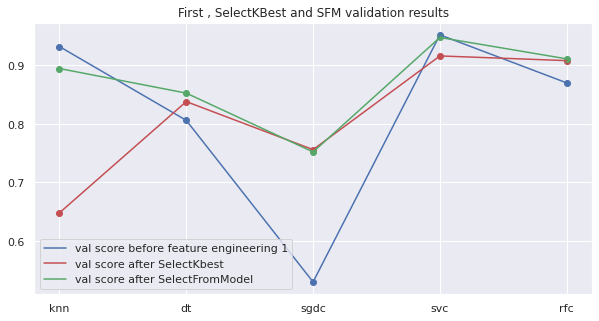

In [121]:
plt.figure(figsize=(10,5))
plt.scatter(x=models.keys(),y=val_results,c='b',)
plt.plot(val_results,c='b',label='val score before feature engineering 1')

plt.scatter(x=models.keys(),y=val_results2,c='r')
plt.plot(val_results2,c='r',label='val score after SelectKbest')

plt.scatter(x=models.keys(),y=val_results_sfm,c='g')
plt.plot(val_results_sfm,c='g',label='val score after SelectFromModel')

plt.legend()
plt.title('First , SelectKBest and SFM validation results')

#### Observation:
##### -After degriding the knn model in second train with 'SelectKbest' ,we had an intresting improvement with 'SelectFromModel'.
##### -To resume: our results looks like we got the best results from previous  trainings.And the best features are those which have best correlation with target feature. 
##### -what's next? After selection the best features ,next will try to choose the best params with 'RandomizedSearchCV'.

In [122]:
best_x=x_sgdc_sfm.copy()

# VI.Hyperparameter Tuning:

In [128]:
from sklearn.model_selection import RandomizedSearchCV

## 1.KNeighborsClassifier :

In [129]:
knn_hpt=KNeighborsClassifier()
knn_params={'n_neighbors':np.arange(5,50,1)}
knn_rscv=RandomizedSearchCV(estimator=knn_hpt,param_distributions=knn_params,
                            cv=StratifiedKFold(4),n_iter=100,verbose=1,random_state=42)
knn_rscv.fit(best_x,y2)

Fitting 4 folds for each of 45 candidates, totalling 180 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
                   random_state=42, verbose=1)

In [130]:
knn_rscv_best=knn_rscv.best_estimator_
knn_rscv_best

KNeighborsClassifier(n_neighbors=33)

In [131]:
knn_rscv.best_params_

{'n_neighbors': 33}

In [132]:
knn_rscv.best_score_

0.9125

In [133]:
rscv_val_scores=[]
rscv_val_scores.append(knn_rscv.best_score_)

## 2.DecisionTreeClassifier:

In [134]:
dt_hpt=DecisionTreeClassifier()
dt_params= {"max_depth": [3, None],
              "min_samples_leaf": np.arange(1,9,1),
              "criterion": ["gini", "entropy"]}
dt_rscv=RandomizedSearchCV(estimator=dt_hpt,param_distributions=dt_params,
                            cv=StratifiedKFold(4),n_iter=100,verbose=1,random_state=42)
dt_rscv.fit(best_x,y2)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8])},
                   random_state=42, verbose=1)

In [135]:
dt_rscv_best=dt_rscv.best_estimator_
dt_rscv_best

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

In [136]:
dt_rscv.best_params_

{'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy'}

In [137]:
dt_rscv.best_score_

0.8795000000000001

In [138]:
rscv_val_scores.append(dt_rscv.best_score_)

## 3.SGDClassifier:

In [139]:
sgdc_hpt=SGDClassifier()
sgdc_params= {'penalty' : ['l1', 'l2', 'elasticnet'] ,'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'eta0' : [1, 10, 100]}
sgdc_rscv=RandomizedSearchCV(estimator=sgdc_hpt,param_distributions=sgdc_params,n_iter=100,n_jobs=4,
                             cv=StratifiedKFold(4),verbose=1)
sgdc_rscv.fit(best_x,y2)

Fitting 4 folds for each of 72 candidates, totalling 288 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=SGDClassifier(), n_iter=100, n_jobs=4,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100, 1000],
                                        'eta0': [1, 10, 100],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   verbose=1)

In [140]:
sgdc_rscv.best_estimator_

SGDClassifier(eta0=10, penalty='l1')

In [141]:
sgdc_rscv.best_params_

{'penalty': 'l1', 'eta0': 10, 'alpha': 0.0001}

In [142]:
sgdc_rscv.best_score_

0.79

In [143]:
rscv_val_scores.append(sgdc_rscv.best_score_)

## 4.SVC:

In [144]:

svc_params={
    "C": [ 0.1 ,1,10 ],
    "kernel": ['rbf', 'poly'],
    "gamma":[ 0.1,1 ,10 ]
    }
svc_rscv=RandomizedSearchCV(estimator=SVC(),param_distributions=svc_params,n_iter=100,n_jobs=4,verbose=1,
                            cv=StratifiedKFold(4))
svc_rscv.fit(best_x,y2)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=SVC(), n_iter=100, n_jobs=4,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': [0.1, 1, 10],
                                        'kernel': ['rbf', 'poly']},
                   verbose=1)

In [145]:
svc_rscv.best_estimator_

SVC(C=10, gamma=1)

In [146]:
svc_rscv.best_params_

{'kernel': 'rbf', 'gamma': 1, 'C': 10}

In [147]:
svc_rscv.best_score_ 

0.9535

In [148]:
svc_b=SVC(kernel='rbf', gamma=1,C=10)

In [149]:
cross_val_score(svc_b,best_x,y2,cv=StratifiedKFold(4)).mean()

0.9535

In [150]:
rscv_val_scores.append(svc_rscv.best_score_)

In [151]:
rscv_val_scores

[0.9125, 0.8795000000000001, 0.79, 0.9535]

## 5.RandomForestClassifier:

In [152]:
rfc_params={
'max_depth': [10, 20, 30, 40, 60, 70, 80, 100, None],
'n_estimators': [50,200,300, 400, 600]}
rfc_rscv=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=rfc_params,n_iter=100,n_jobs=4,verbose=5,
                            cv=StratifiedKFold(4))
rfc_rscv.fit(best_x,y2)

Fitting 4 folds for each of 45 candidates, totalling 180 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=100, n_jobs=4,
                   param_distributions={'max_depth': [10, 20, 30, 40, 60, 70,
                                                      80, 100, None],
                                        'n_estimators': [50, 200, 300, 400,
                                                         600]},
                   verbose=5)

In [153]:
rfc_rscv.best_estimator_

RandomForestClassifier(max_depth=30, n_estimators=300)

In [154]:
rfc_rscv.best_params_

{'n_estimators': 300, 'max_depth': 30}

In [155]:
rfc_rscv.best_score_

0.92

In [156]:
rscv_val_scores.append(rfc_rscv.best_score_)

## 6.Resume Hyperparameter Tuning: (Validation Results)

Text(0.5, 1.0, 'First , SelectKBest ,SFM and HypParameter Tuning validation results')

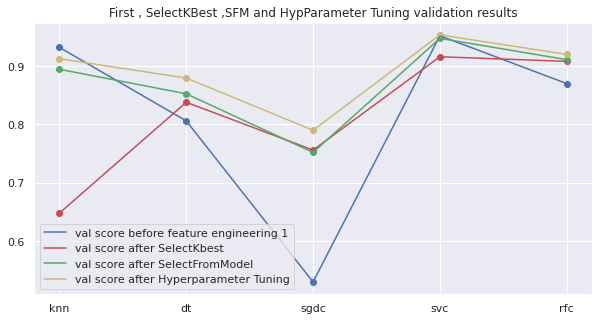

In [157]:
plt.figure(figsize=(10,5))
plt.scatter(x=models.keys(),y=val_results,c='b',)
plt.plot(val_results,c='b',label='val score before feature engineering 1')

plt.scatter(x=models.keys(),y=val_results2,c='r')
plt.plot(val_results2,c='r',label='val score after SelectKbest')

plt.scatter(x=models.keys(),y=val_results_sfm,c='g')
plt.plot(val_results_sfm,c='g',label='val score after SelectFromModel')

plt.scatter(x=models.keys(),y=rscv_val_scores,c='y')
plt.plot(rscv_val_scores,c='y',label='val score after Hyperparameter Tuning')

plt.legend()
plt.title('First , SelectKBest ,SFM and HypParameter Tuning validation results')

#### Observation (validation results):
##### -SVC is the best model for this problem.
##### -We have an improvement with Hyperparamater Tuning.
##### -SGDC is better then before.
##### *We have now the best features and the params.In next step we will try to boost our estimators.

# VII.Boosting:

##### Boosting is a technique that aims at combining multiple weak classifiers to build one strong *classifier* .

In [158]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import validation_curve 

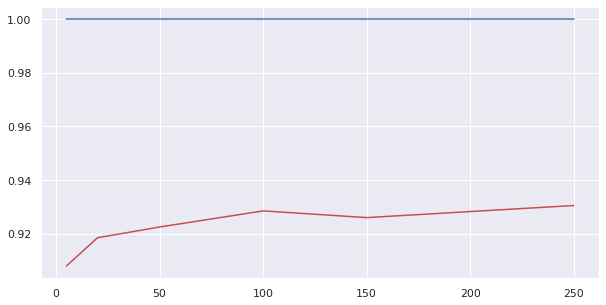

In [159]:
n_estimators=[5,20,50,100,150,250]
estimator=DecisionTreeClassifier(min_samples_leaf=3,max_depth=None,criterion='entropy')
ada=AdaBoostClassifier(estimator)
cv=StratifiedKFold(4)

train_score,val_score=validation_curve(estimator=ada,X=best_x,y=y2,param_name='n_estimators',param_range=n_estimators,cv=cv)
plt.figure(figsize=(10,5))
plt.plot(n_estimators,train_score.mean(axis=1))
plt.plot(n_estimators,val_score.mean(axis=1),c='r')

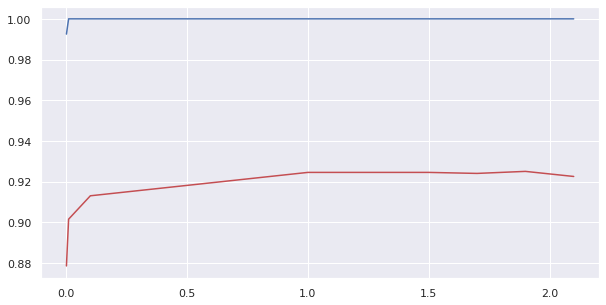

In [160]:
learning_rates=[0.001,0.01,0.1,1,1.5,1.7,1.9,2.1]
estimator=DecisionTreeClassifier(min_samples_leaf=3,max_depth=None,criterion='entropy')
ada=AdaBoostClassifier(estimator)
cv=StratifiedKFold(4)

train_score,val_score=validation_curve(estimator=ada,X=best_x,y=y2,param_name='learning_rate',param_range=learning_rates,cv=cv)
plt.figure(figsize=(10,5))
plt.plot(learning_rates,train_score.mean(axis=1))
plt.plot(learning_rates,val_score.mean(axis=1),c='r')

#### Observation :
##### -best learning rate for adaboostclassifier with decisionTreeClassifier as  estimator is 1 . 
##### -best n_estimators for adaboostclassifier decisionTreeClassifier as  estimator is 100 .

In [161]:
best_dt=DecisionTreeClassifier(min_samples_leaf=3,max_depth=None,criterion='entropy')
best_ada=AdaBoostClassifier(best_dt,n_estimators=100,learning_rate=1)
cross_val_score(best_ada,best_x,y2,cv=cv).mean()

0.9255000000000001

# VIII. BAGGING:
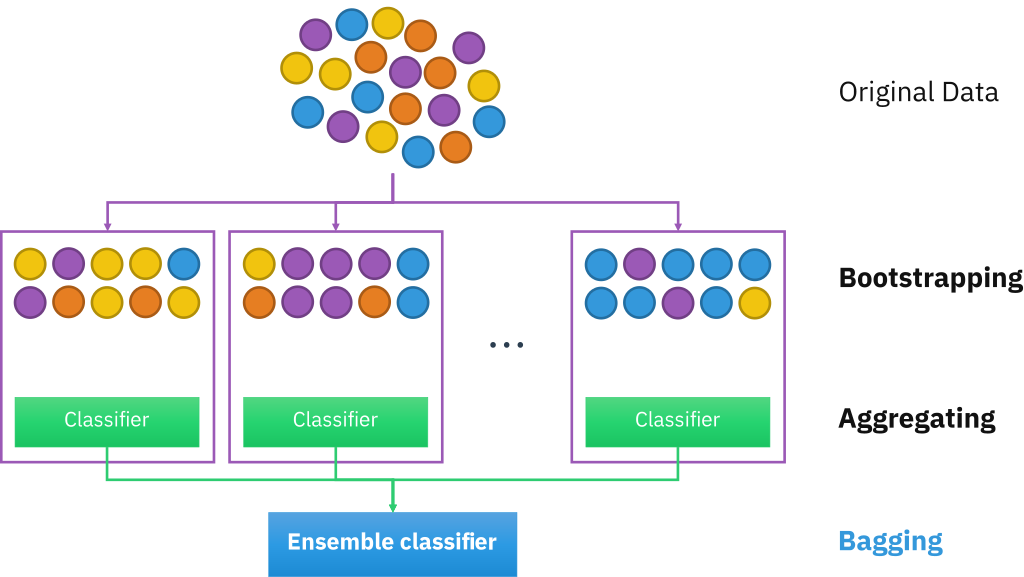

####How bagging works

##### ***-Bootstrapping***:  Bagging leverages a bootstrapping sampling technique to create diverse samples. This resampling method generates different subsets of the training dataset by selecting data points at random and with replacement. This means that each time you select a data point from the training dataset, you are able to select the same instance multiple times. As a result, a value/instance repeated twice (or more) in a sample.

##### ***-Parallel training***: These bootstrap samples are then trained independently and in parallel with each other using weak or base learners.

##### ***-Aggregation***: Finally, depending on the task (i.e. regression or classification), an average or a majority of the predictions are taken to compute a more accurate estimate. In the case of regression, an average is taken of all the outputs predicted by the individual classifiers; this is known as soft voting. For classification problems, the class with the highest majority of votes is accepted; this is known as hard voting or majority voting.

In [162]:
from sklearn.ensemble import BaggingClassifier

##1. Bagging with decisionTreeClassifier :

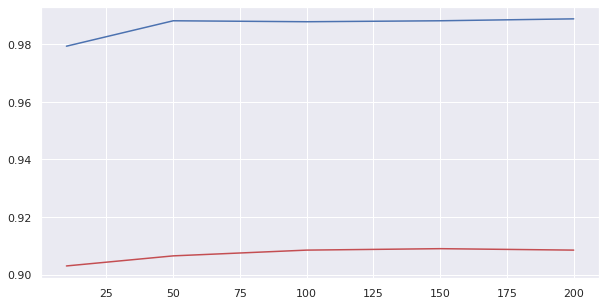

In [163]:
estimator=DecisionTreeClassifier(min_samples_leaf=3,max_depth=None,criterion='entropy')
bc=BaggingClassifier(estimator)

n_estimators=[10,50,100,150,200]
cv=StratifiedKFold(4)

train_score,val_score=validation_curve(bc,best_x,y2,param_name='n_estimators',param_range=n_estimators,cv=cv)

plt.figure(figsize=(10,5))
plt.plot(n_estimators,train_score.mean(axis=1))
plt.plot(n_estimators,val_score.mean(axis=1),c='r')

#### Observation:
##### Boosting is better then Bagging with decisionTreeClassifer ((BAGGING) 0.91 < 0.93 (BOOSTING) )

## 2. Bagging with SGDClassifier:

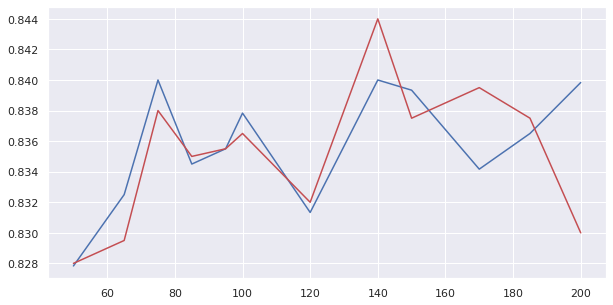

In [164]:
best_sgdc=SGDClassifier(penalty='l1',eta0=100,alpha=0.0001)
bc=BaggingClassifier(best_sgdc)

n_estimators=[50,65,75,85,95,100,120,140,150,170,185,200]
cv=StratifiedKFold(4)

train_score,val_score=validation_curve(bc,best_x,y2,param_name='n_estimators',param_range=n_estimators,cv=cv)

plt.figure(figsize=(10,5))
plt.plot(n_estimators,train_score.mean(axis=1))
plt.plot(n_estimators,val_score.mean(axis=1),c='r')

In [165]:
best_sgdc=SGDClassifier(penalty='l1',eta0=100,alpha=0.0001)
bc=BaggingClassifier(best_sgdc,n_estimators=185)
cross_val_score(bc,best_x,y2,cv=cv).mean()

0.832

## 3.Bagging with KNeighborsClassifier


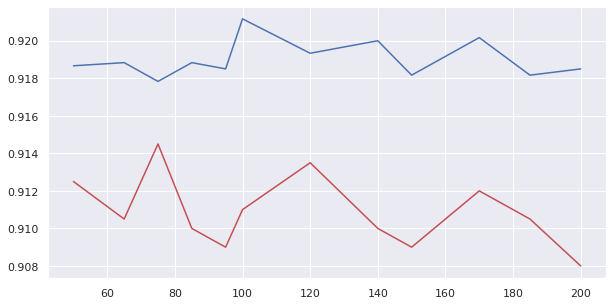

In [166]:
best_knn=KNeighborsClassifier(n_neighbors=33)
bc=BaggingClassifier(best_knn)

n_estimators=[50,65,75,85,95,100,120,140,150,170,185,200]
cv=StratifiedKFold(4)

train_score,val_score=validation_curve(bc,best_x,y2,param_name='n_estimators',param_range=n_estimators,cv=cv)

plt.figure(figsize=(10,5))
plt.plot(n_estimators,train_score.mean(axis=1))
plt.plot(n_estimators,val_score.mean(axis=1),c='r')

In [167]:
best_knn=KNeighborsClassifier(n_neighbors=33)
bc=BaggingClassifier(best_knn,n_estimators=85)
cross_val_score(bc,best_x,y2,cv=cv).mean()

0.9105000000000001

## 4.Bagging with SVC:

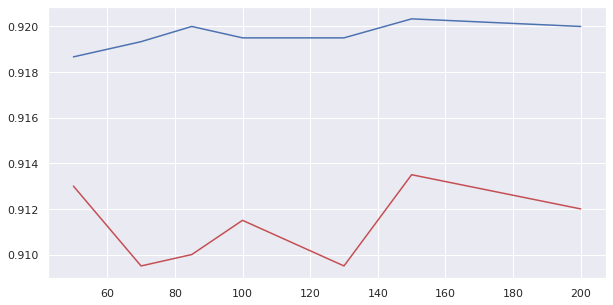

In [168]:
best_SVC=SVC(C=10, gamma=1)
bc=BaggingClassifier(best_knn)

n_estimators=[50,70,85,100,130,150,200]
cv=StratifiedKFold(4)

train_score,val_score=validation_curve(bc,best_x,y2,param_name='n_estimators',param_range=n_estimators,cv=cv)

plt.figure(figsize=(10,5))
plt.plot(n_estimators,train_score.mean(axis=1))
plt.plot(n_estimators,val_score.mean(axis=1),c='r')

In [169]:
best_SVC=SVC(C=10, gamma=1)
bc=BaggingClassifier(best_SVC,n_estimators=85)
cross_val_score(bc,best_x,y2,cv=cv).mean()

0.9529999999999998

## 5.Bagging with RandomForestClassifier:

In [170]:
best_rfc=RandomForestClassifier(n_estimators=200,max_depth= 70)
bc=BaggingClassifier(best_rfc,n_estimators=85)
cross_val_score(bc,best_x,y2,cv=cv).mean()

0.918

In [171]:
bagging_val_results=[0.91,0.91,0.832,0.95,0.91]

## 6.Resume with plots: 

Text(0.5, 1.0, 'First , SelectKBest ,SFM , HpTuning and Bagging validation results')

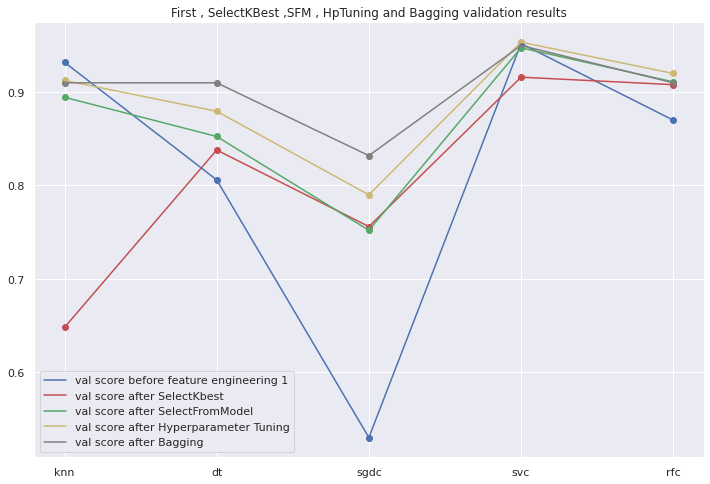

In [172]:
plt.figure(figsize=(12,8))
plt.scatter(x=models.keys(),y=val_results,c='b',)
plt.plot(val_results,c='b',label='val score before feature engineering 1')


plt.scatter(x=models.keys(),y=val_results2,c='r')
plt.plot(val_results2,c='r',label='val score after SelectKbest')


plt.scatter(x=models.keys(),y=val_results_sfm,c='g')
plt.plot(val_results_sfm,c='g',label='val score after SelectFromModel')



plt.scatter(x=models.keys(),y=rscv_val_scores,c='y')
plt.plot(rscv_val_scores,c='y',label='val score after Hyperparameter Tuning')


plt.scatter(x=models.keys(),y=bagging_val_results,c='grey')
plt.plot(bagging_val_results,c='grey',label='val score after Bagging')

plt.legend()
plt.title('First , SelectKBest ,SFM , HpTuning and Bagging validation results')

#### Observation:
##### -We have no improvement with knn,svc and RandomForestClassifier.
#####  -DecisionTree Model and SGDClassifier still increasing.

# IX.Stacking 

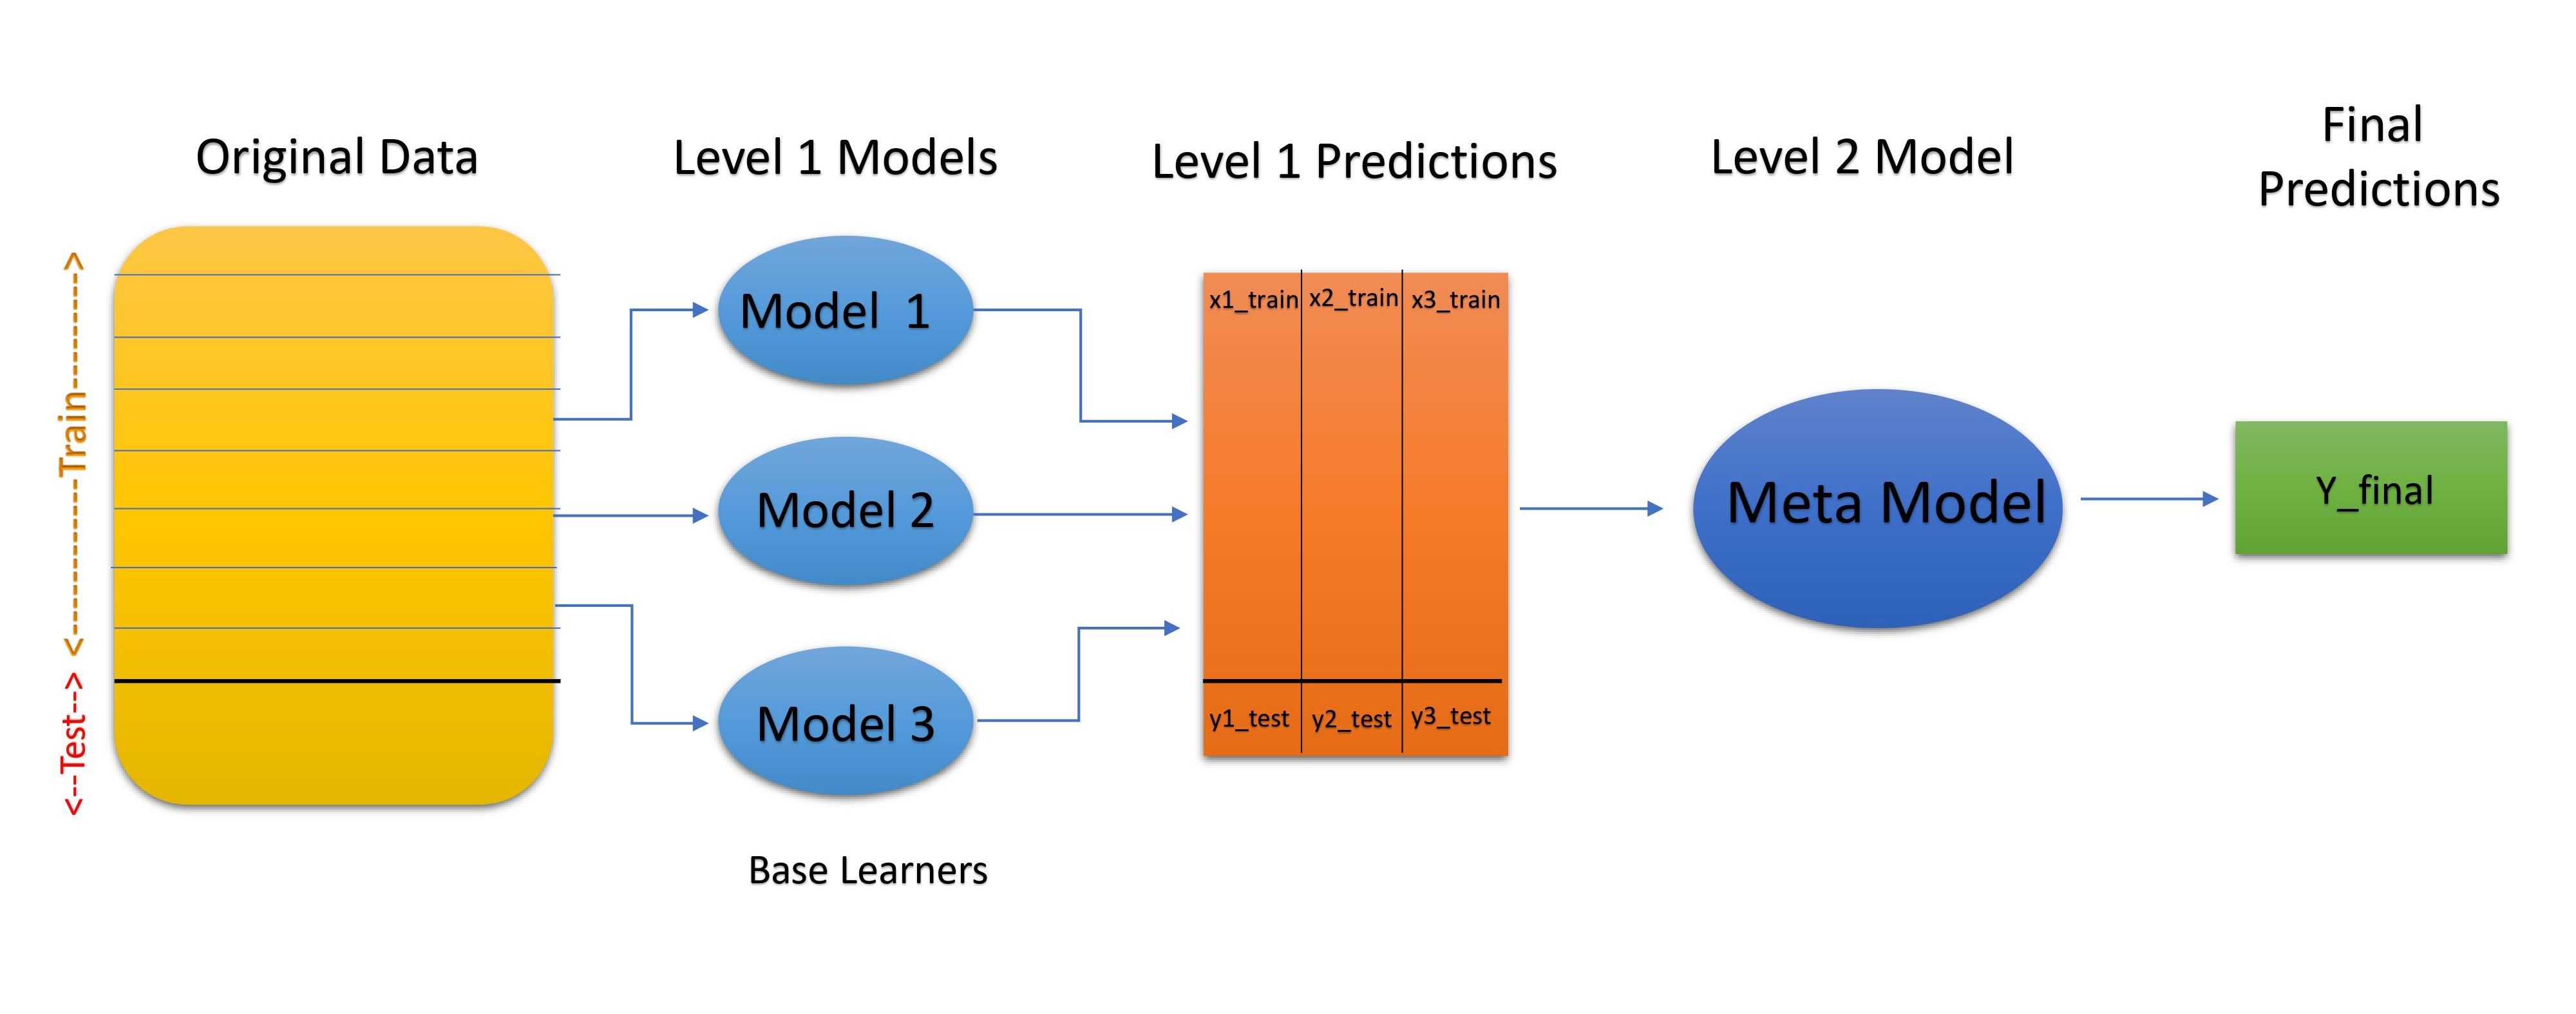

In [173]:
from sklearn.ensemble import StackingClassifier

In [174]:
best_knn=KNeighborsClassifier(n_neighbors=33)

best_dc=DecisionTreeClassifier(min_samples_leaf=3,max_depth=None,criterion='entropy')
bagg_dc=BaggingClassifier(best_dc,n_estimators=85)

best_sgdc=SGDClassifier(penalty='l1',eta0=100,alpha=0.0001)
bagg_sgdc=BaggingClassifier(best_sgdc,n_estimators=85)

best_svc=SVC(C=10, gamma=1,probability=True)
best_rfc=RandomForestClassifier(n_estimators=200,max_depth= 70)

level1=[('best_knn',best_knn),
        ('bagg_dc',bagg_dc),
        ('bagg_sgdc',bagg_sgdc),
        ('best_rfc',best_rfc),
        ('best_svc',best_svc)
        ]
final=RandomForestClassifier()

stack=StackingClassifier(estimators=level1,final_estimator=final,verbose=2)

In [175]:
cross_val_score(stack,best_x,y2,cv=cv).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

0.9504999999999999

# X.Voting :

In [176]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix,f1_score

In [177]:
best_x_train,best_x_val,y2_train,y2_val=train_test_split(best_x,y2,test_size=0.25,random_state=42)

In [178]:
vot_estimators={('best_knn',best_knn),
        ('bagg_dc',bagg_dc),
        ('bagg_sgdc',bagg_sgdc),
        ('best_rfc',best_rfc),
        ('best_svc',best_svc)
}

In [179]:
VC=VotingClassifier(estimators=vot_estimators,voting='soft')
VC.fit(best_x_train,y2_train)

VotingClassifier(estimators={('bagg_dc',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                      min_samples_leaf=3),
                                                n_estimators=85)),
                             ('bagg_sgdc',
                              BaggingClassifier(base_estimator=SGDClassifier(eta0=100,
                                                                             penalty='l1'),
                                                n_estimators=85)),
                             ('best_knn', KNeighborsClassifier(n_neighbors=33)),
                             ('best_rfc',
                              RandomForestClassifier(max_depth=70,
                                                     n_estimators=200)),
                             ('best_svc',
                              SVC(C=10, gamma=1, probability=True))},
              

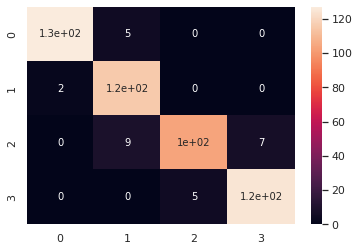

In [180]:
y_pred=VC.predict(best_x_val)
cm=confusion_matrix(y_val,y_pred)
sns.heatmap(cm,annot=True)

In [181]:
print(classification_report(y2_val,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       132
           1       0.89      0.98      0.94       118
           2       0.95      0.87      0.91       120
           3       0.95      0.96      0.95       130

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.95      0.94      0.94       500



In [182]:
VC=VotingClassifier(estimators=vot_estimators,voting='soft')
cross_val_score(VC,best_x,y2,cv=cv).mean()

0.943

# Artificial Neural Network

In [183]:
from keras.layers import Dense
from keras.models import Sequential

In [184]:
ann=Sequential([
    Dense(32,activation='relu',input_shape=(4,)),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(4,activation='softmax')
])

In [185]:
ann.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [186]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 4,484
Trainable params: 4,484
Non-trainable params: 0
_________________________________________________________________


In [187]:
from sklearn.model_selection import train_test_split

In [188]:
x_train,x_val,y_train,y_val=train_test_split(best_x,y2,test_size=0.25,random_state=42)

In [189]:
x_train.shape

(1500, 4)

In [190]:
x_train.head()

battery_power  px_height  px_width       ram
1738       0.006680   0.191146  0.510013  0.567076
548        0.093520   0.217188  0.172897  0.892304
936        0.203073   0.657292  0.692924  0.906200
1389       0.868403   0.052083  0.806409  0.000534
1607       0.162325   0.652083  0.976636  0.653127

In [191]:
ann.fit(x_train.values,y_train,validation_split=0.2,batch_size=10,epochs=400)

Epoch 1/400
120/120 [==============================] - 1s 4ms/step - loss: 1.2955 - accuracy: 0.3225 - val_loss: 1.0933 - val_accuracy: 0.6267
Epoch 2/400
120/120 [==============================] - 0s 2ms/step - loss: 0.7856 - accuracy: 0.7100 - val_loss: 0.5462 - val_accuracy: 0.7800
Epoch 3/400
120/120 [==============================] - 0s 3ms/step - loss: 0.4266 - accuracy: 0.8658 - val_loss: 0.3232 - val_accuracy: 0.9167
Epoch 4/400
120/120 [==============================] - 0s 3ms/step - loss: 0.2904 - accuracy: 0.9042 - val_loss: 0.2670 - val_accuracy: 0.8867
Epoch 5/400
120/120 [==============================] - 0s 3ms/step - loss: 0.2353 - accuracy: 0.9175 - val_loss: 0.2111 - val_accuracy: 0.9267
Epoch 6/400
120/120 [==============================] - 0s 3ms/step - loss: 0.2057 - accuracy: 0.9308 - val_loss: 0.1888 - val_accuracy: 0.9333
Epoch 7/400
120/120 [==============================] - 0s 3ms/step - loss: 0.1808 - accuracy: 0.9383 - val_loss: 0.1489 - val_accuracy: 0.9500

In [192]:
y_pred=[np.argmax(i) for i in ann.predict(x_val)]

In [193]:
cm=confusion_matrix(y_val,y_pred)

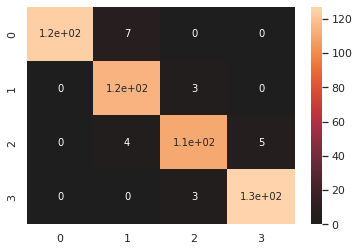

In [194]:
sns.heatmap(cm,annot=True,center=0)

In [195]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       132
           1       0.91      0.97      0.94       118
           2       0.95      0.93      0.94       120
           3       0.96      0.98      0.97       130

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [196]:
f1_score(y_val,y_pred,average='micro')

0.956